<a href="https://colab.research.google.com/github/lucashamon1/Estimativa_do_preco_imoveis_2/blob/main/Estima%C3%A7%C3%A3o_do_valor_de_Im%C3%B3veis_2_ipynp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
dados = pd.read_csv('dataset.csv', sep=';')

In [ ]:
dados.head(5)

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


In [ ]:
dados.shape

(5000, 4)

##**Análises Preliminares**

In [ ]:
dados.describe().round(2)

,Valor,Area,Dist_Praia,Dist_Farmacia
count,5000.00,5000.00,5000.00,5000.00
mean,1402926.39,121.94,3.02,0.50
std,1883268.85,90.54,3.17,0.29
min,75000.00,16.00,0.00,0.00
25%,460000.00,70.00,0.44,0.24
50%,820000.00,93.00,1.48,0.50
75%,1590000.00,146.00,5.61,0.75
max,25000000.00,2000.00,17.96,1.00


In [ ]:
dados.corr().round(4)

,Valor,Area,Dist_Praia,Dist_Farmacia
Valor,1.0000,0.7110,-0.3665,-0.0244
Area,0.7110,1.0000,-0.2834,-0.0310
Dist_Praia,-0.3665,-0.2834,1.0000,0.0256
Dist_Farmacia,-0.0244,-0.0310,0.0256,1.0000


In [ ]:
import seaborn as sns

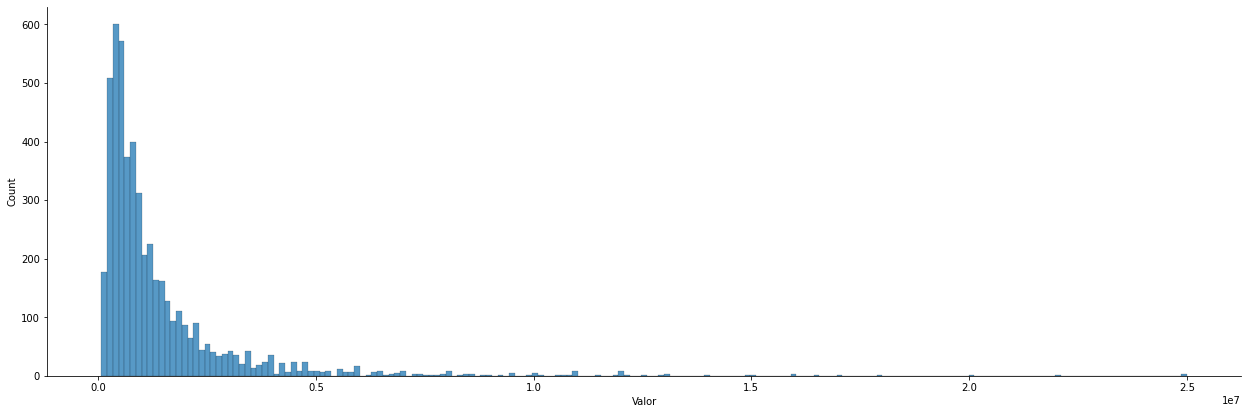

In [ ]:
ax = sns.displot(dados['Valor'])
ax.figure.set_size_inches(20, 6)
ax

In [ ]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

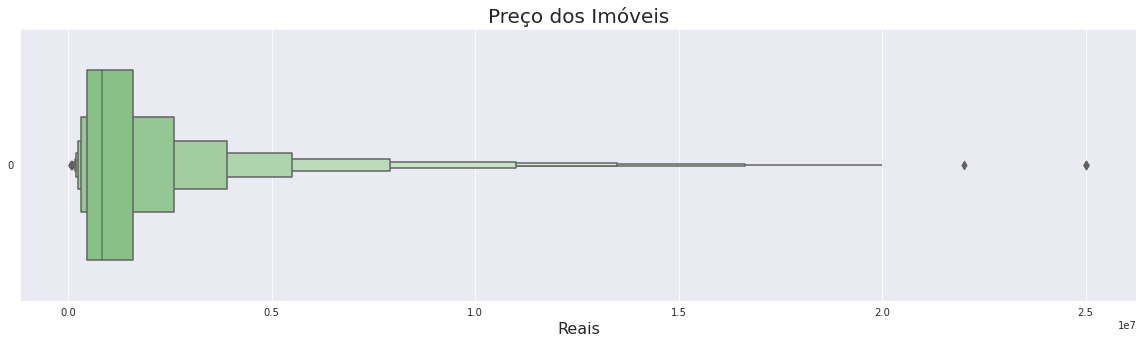

In [ ]:
ax = sns.boxenplot(data=dados['Valor'], orient= 'h', width=0.7)
ax.figure.set_size_inches(20, 5)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_xlabel('Reais', fontsize=16)
ax

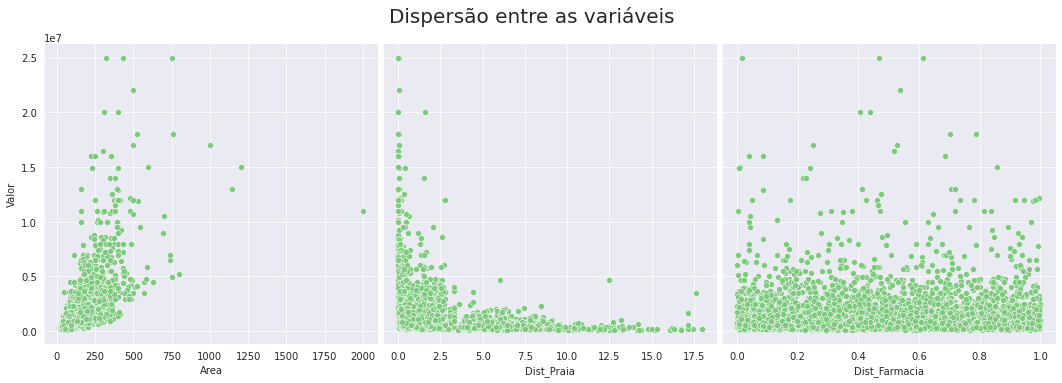

In [ ]:
ax = sns.pairplot(dados, y_vars='Valor', x_vars=['Area', 'Dist_Praia', 'Dist_Farmacia'], height=5)
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=20, y=1.05)
ax

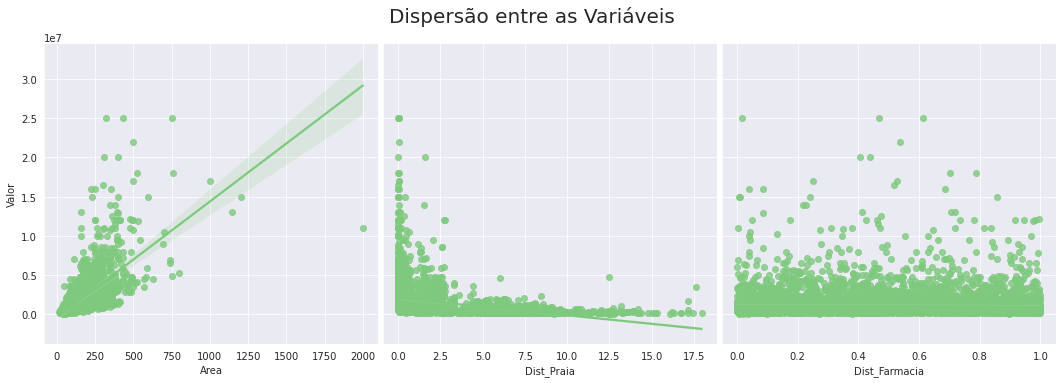

In [ ]:
ax = sns.pairplot(dados, y_vars='Valor', x_vars=['Area', 'Dist_Praia', 'Dist_Farmacia'], kind='reg', height=5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

##**Transformação Logarítmica Nos Dados**

In [ ]:
import numpy as np

In [ ]:
dados['log_Valor'] = np.log(dados['Valor'])
dados['log_Area'] = np.log(dados['Area'])
dados['log_Dist_Praia'] = np.log(dados['Dist_Praia'] + 1)
dados['log_Dist_Farmacia'] = np.log(dados['Dist_Farmacia'] + 1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


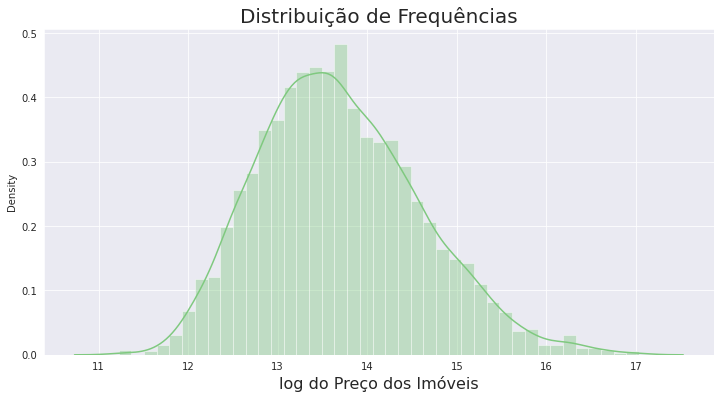

In [ ]:
ax = sns.distplot(dados['log_Valor'])
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('log do Preço dos Imóveis', fontsize=16)
ax

##Verificando Relação Linear

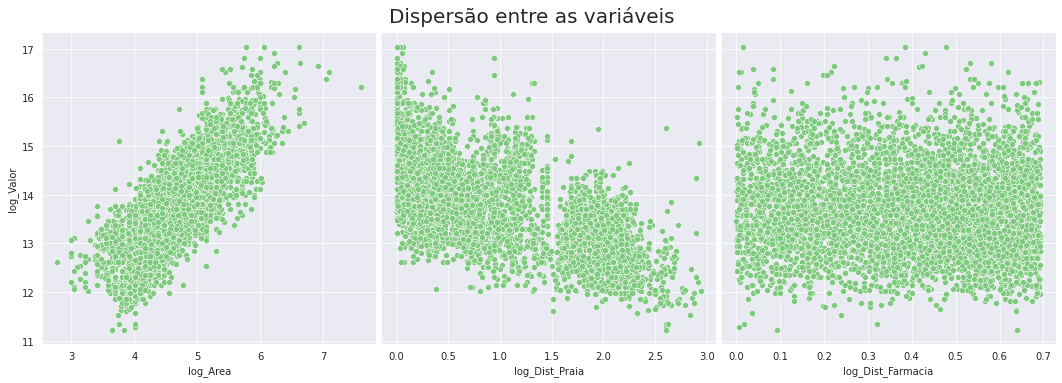

In [ ]:
ax = sns.pairplot(dados, y_vars='log_Valor', x_vars=['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia'], height=5)
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=20, y=1.05)
ax

##**Criando os Datasets de Treino e de Teste**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = dados['log_Valor']

In [ ]:
x = dados[['log_Area','log_Dist_Praia','log_Dist_Farmacia']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2811)

In [ ]:
import statsmodels.api as sm 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
x_train_com_constante = sm.add_constant(x_train)

In [ ]:
x_train_com_constante

,const,log_Area,log_Dist_Praia,log_Dist_Farmacia
2661,1.0,5.945421,0.000000,0.382273
912,1.0,3.135494,0.972865,0.605015
3042,1.0,4.317488,1.794961,0.486594
141,1.0,3.401197,0.310455,0.599609
3854,1.0,5.676754,0.032193,0.101903
...,...,...,...,...
3657,1.0,5.075174,2.023480,0.333605
979,1.0,4.174387,2.296141,0.156465
2389,1.0,4.394449,1.367741,0.409727
447,1.0,3.951244,2.166841,0.217381


In [ ]:
modelo_statsmodels = sm.OLS(y_train, x_train_com_constante, hascont = True).fit()

In [ ]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Sun, 16 Jan 2022   Prob (F-statistic):               0.00
Time:                        10:45:47   Log-Likelihood:                -2044.9
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.3417      0.06

##Ajuste no modelo

In [ ]:
x = [['log_Area', 'log_Dist_Praia']]

In [ ]:
x_train_com_constante = sm.add_constant(x_train)

modelo_statsmodels = sm.OLS(y_train, x_train_com_constante, hasconst = True).fit()

In [ ]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Sun, 16 Jan 2022   Prob (F-statistic):               0.00
Time:                        10:48:27   Log-Likelihood:                -2044.9
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.3417      0.06

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

In [ ]:
modelo = LinearRegression()

In [ ]:
modelo.fit(x_train, y_train)

LinearRegression()

In [ ]:
print('R2 = {}'.format(modelo.score(x_train, y_train).round(3)))

R2 = 0.805


In [ ]:
y_previsto = modelo.predict(x_test)

In [ ]:
print('R2 = %s' % metrics.r2_score(y_test, y_previsto).round(3))

R2 = 0.79


In [ ]:
entrada = x_test[0:1]
entrada

,log_Area,log_Dist_Praia,log_Dist_Farmacia
1006,5.273,1.282769,0.546323


In [ ]:
modelo.predict(entrada)[0]

14.28208909111974

In [ ]:
np.exp(modelo.predict(entrada)[0])

1594529.220576447

##Interpretação dos Coeficientes

In [ ]:
modelo.intercept_

9.341686608010669

In [ ]:
np.exp(modelo.intercept_)

11403.625475732422

Coeficientes de Regressão

In [ ]:
modelo.coef_

array([ 1.05798934, -0.49054601, -0.01668921])

In [ ]:
x_test.columns

Index(['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia'], dtype='object')

In [ ]:
index = ['Intercepto','log Área', 'log Distância até a Praia']

##**Analises Graficas**

In [ ]:
y_previsto_train = modelo.predict(x_train)

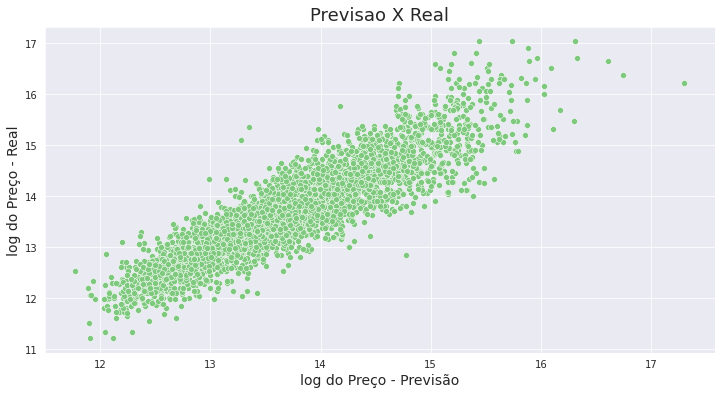

In [ ]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsao X Real', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('log do Preço - Real', fontsize=14)
ax

In [ ]:
residuo = y_train - y_previsto_train

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


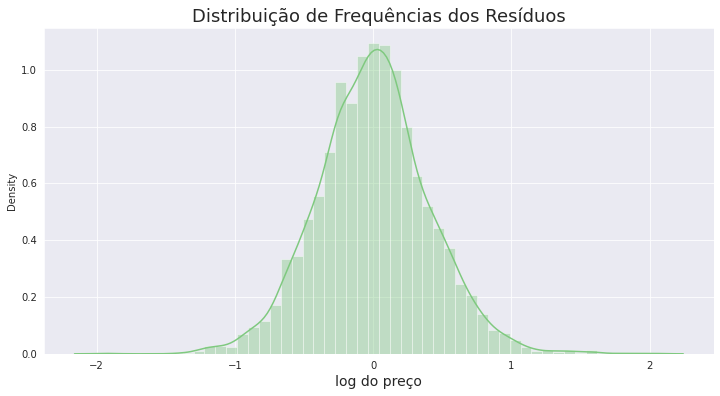

In [ ]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('log do preço', fontsize=14)
ax